# 🚀 Quickstart — Telemachus Dataset

Ce notebook charge le dataset **Telemachus v0.1** depuis GitHub (CSV) et affiche quelques aperçus + un graphe de vitesse.

**Astuce** : si tu clones le repo, tu peux aussi lire `samples.parquet` localement pour de meilleures perfs.

In [9]:
# Installe les dépendances (Colab)
%pip -q install --upgrade pip
%pip -q install pandas pyarrow matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1) Charger le dataset (CSV via GitHub Raw)

In [10]:
import pandas as pd
import json, urllib.request
from IPython.display import display

# Modifie ces variables si tu veux charger une autre version
ORG = "telemachus3"
REPO = "telemachus-datasets"
DATASET_DIR = "2025-10-01-v1.0"

raw_base = f"https://raw.githubusercontent.com/{ORG}/{REPO}/main/{DATASET_DIR}"
csv_url = f"{raw_base}/samples.csv"
manifest_url = f"{raw_base}/dataset.json"

# Charger le manifest
with urllib.request.urlopen(manifest_url) as r:
    manifest = json.loads(r.read().decode("utf-8"))
print("Format:", manifest.get("format"))
print("Version:", manifest.get("version"))
print("column_aliases:", manifest.get("column_aliases", {}))

# Charger le CSV
df = pd.read_csv(csv_url)
print("Rows:", len(df), "Cols:", len(df.columns))
display(df.head())
print("Colonnes:")
print(list(df.columns))

Format: Telemachus
Version: 0.1
column_aliases: {}
Rows: 131186 Cols: 15


,ts,lat,lon,speed_mps,ax_mps2,ay_mps2,az_mps2,gx_rad_s,gy_rad_s,gz_rad_s,heading_deg,altitude_m,slope_percent,vehicle_id,trip_id
0,2025-09-03T12:00:00.000000Z,49.443481,1.098665,0.0,0.201257,-0.090996,9.685123,0.005206,0.002099,0.006731,NaN,17.058687,1.519407,VL-HN-01,HN-TELEMACHUS_20251001_090550
1,2025-09-03T12:00:00.100000Z,49.443481,1.098665,0.0,0.074468,-0.015485,9.893386,0.007766,-0.006432,0.010721,NaN,17.058687,1.519407,VL-HN-01,HN-TELEMACHUS_20251001_090550
2,2025-09-03T12:00:00.200000Z,49.443481,1.098665,0.0,0.127904,0.079288,9.744293,0.008822,-0.004830,0.003501,NaN,17.058687,1.519407,VL-HN-01,HN-TELEMACHUS_20251001_090550
3,2025-09-03T12:00:00.300000Z,49.443481,1.098665,0.0,0.210829,0.013728,9.811693,-0.001150,-0.002229,-0.007960,NaN,17.058687,1.519407,VL-HN-01,HN-TELEMACHUS_20251001_090550
4,2025-09-03T12:00:00.400000Z,49.443481,1.098665,0.0,0.196178,-0.037222,9.767013,-0.003182,-0.006609,-0.000186,NaN,17.058687,1.519407,VL-HN-01,HN-TELEMACHUS_20251001_090550


Colonnes:
['ts', 'lat', 'lon', 'speed_mps', 'ax_mps2', 'ay_mps2', 'az_mps2', 'gx_rad_s', 'gy_rad_s', 'gz_rad_s', 'heading_deg', 'altitude_m', 'slope_percent', 'vehicle_id', 'trip_id']


## 2) Graphique: vitesse en fonction du temps (avec gestion des alias)

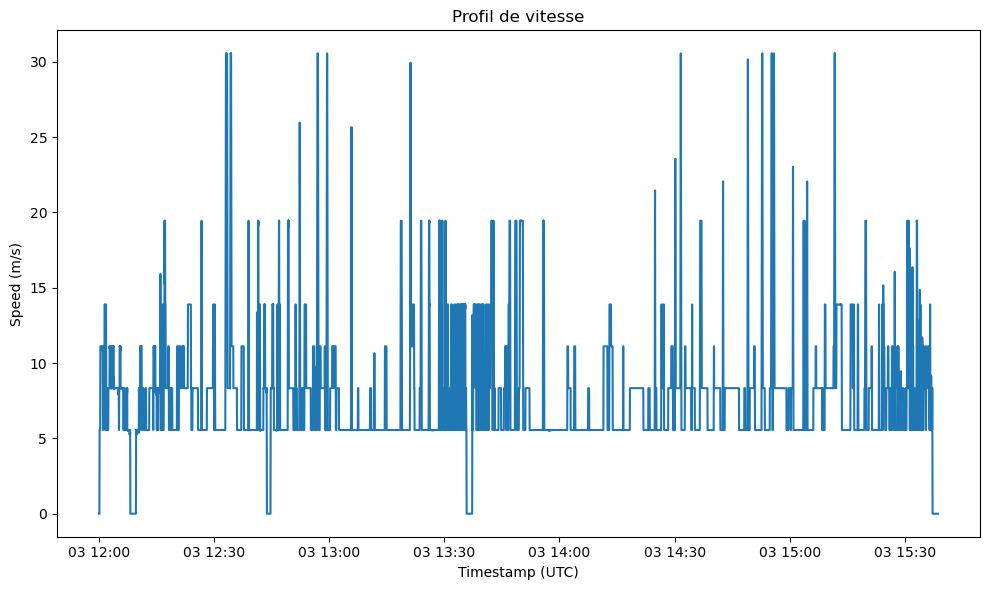

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def pick_col(dframe, candidates):
    for c in candidates:
        if c in dframe.columns:
            return c
    return None

# Résolution d'alias courants
ts_col = pick_col(df, ["timestamp", "ts", "time", "time_iso", "time_ms", "timestamp_ms"]) 
sp_col = pick_col(df, ["speed", "speed_mps", "v", "speed_m_s"]) 

assert ts_col is not None, f"Aucune colonne timestamp-like trouvée; colonnes: {list(df.columns)}"
assert sp_col is not None, f"Aucune colonne speed-like trouvée; colonnes: {list(df.columns)}"

# Conversion de temps
if ts_col in ("time_ms", "timestamp_ms"):
    ts = pd.to_datetime(df[ts_col], unit="ms", utc=True)
else:
    ts = pd.to_datetime(df[ts_col], errors="coerce", utc=True)

# Traçage
plt.figure(figsize=(10, 6))
plt.plot(ts, df[sp_col])
plt.xlabel("Timestamp (UTC)")
plt.ylabel("Speed (m/s)")
plt.title("Profil de vitesse")
plt.tight_layout()
plt.show()